In [7]:
import warnings
import pandas as pd
windows = [3,7,14,21,30,60]
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
warnings.filterwarnings('ignore')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-10486.801, Time=4.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10473.585, Time=1.95 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10491.894, Time=1.74 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10487.286, Time=1.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8576.118, Time=1.85 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10490.423, Time=2.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10490.279, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10488.225, Time=2.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10493.897, Time=1.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-10492.427, Time=1.82 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10492.286, Time=1.82 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10489.289, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10490.280, Time=2.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 27.451 seco

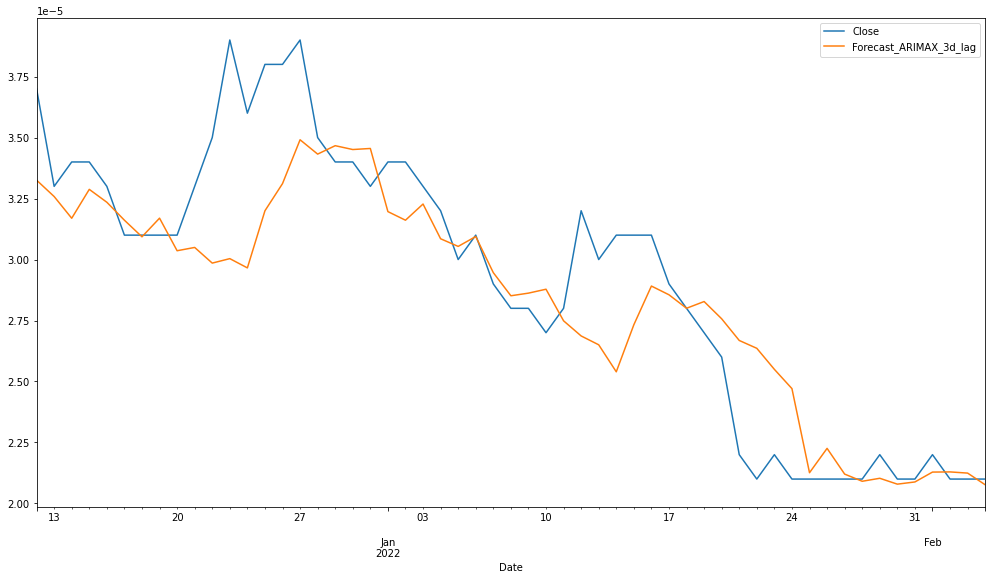

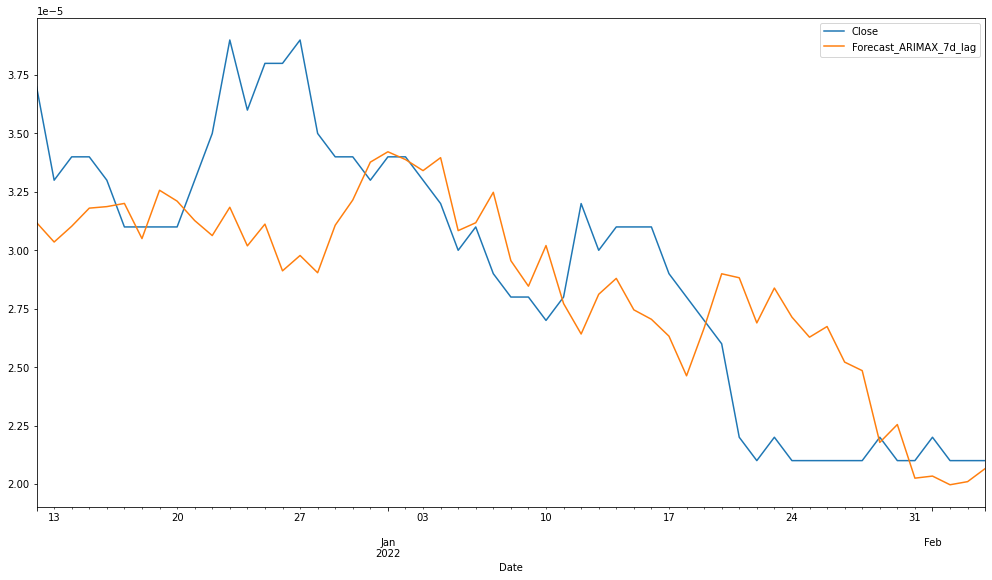

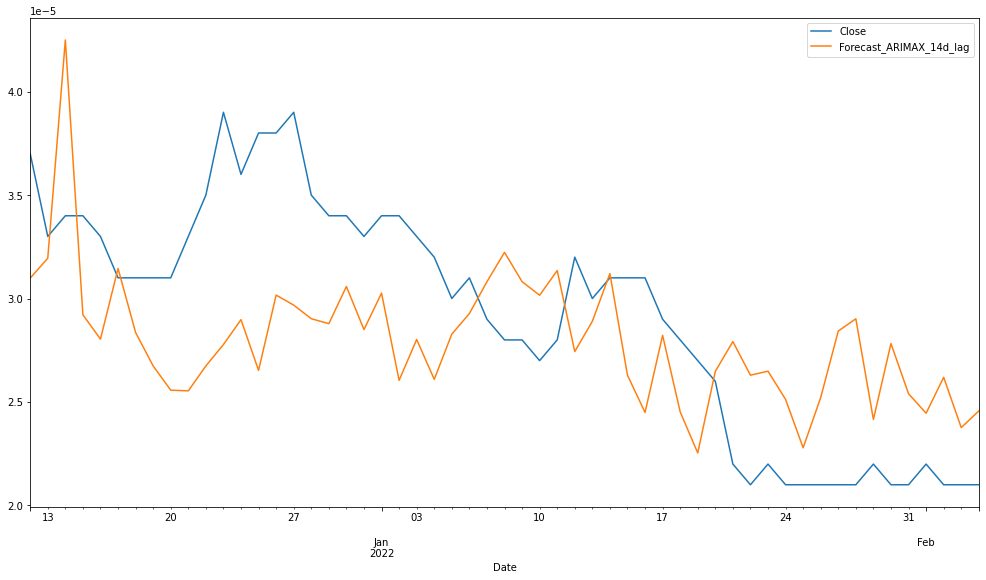

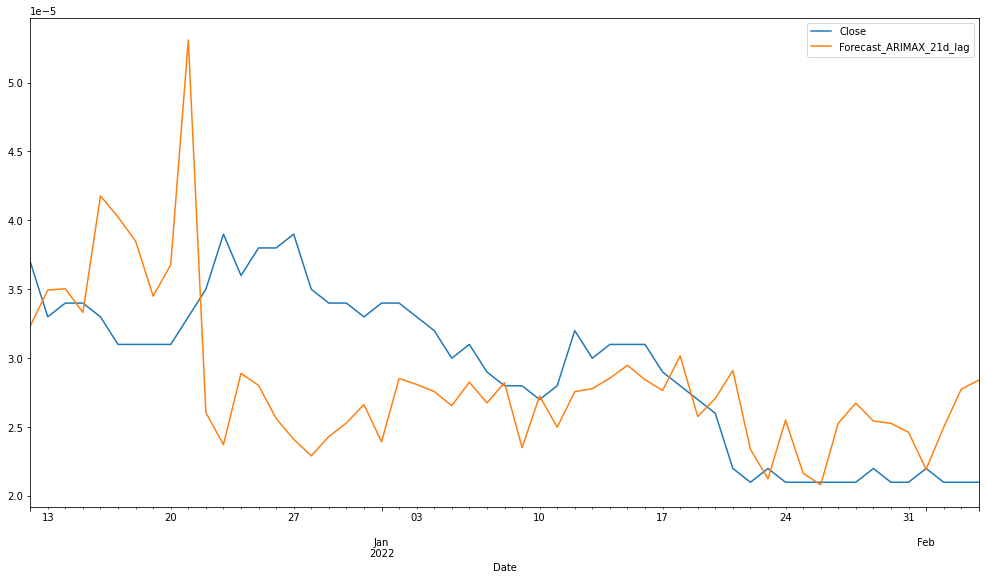

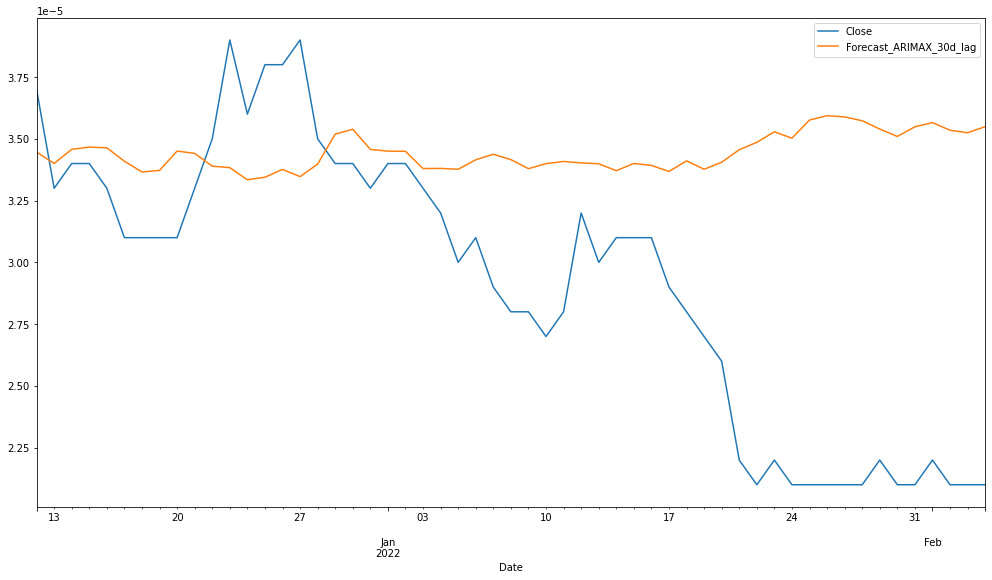

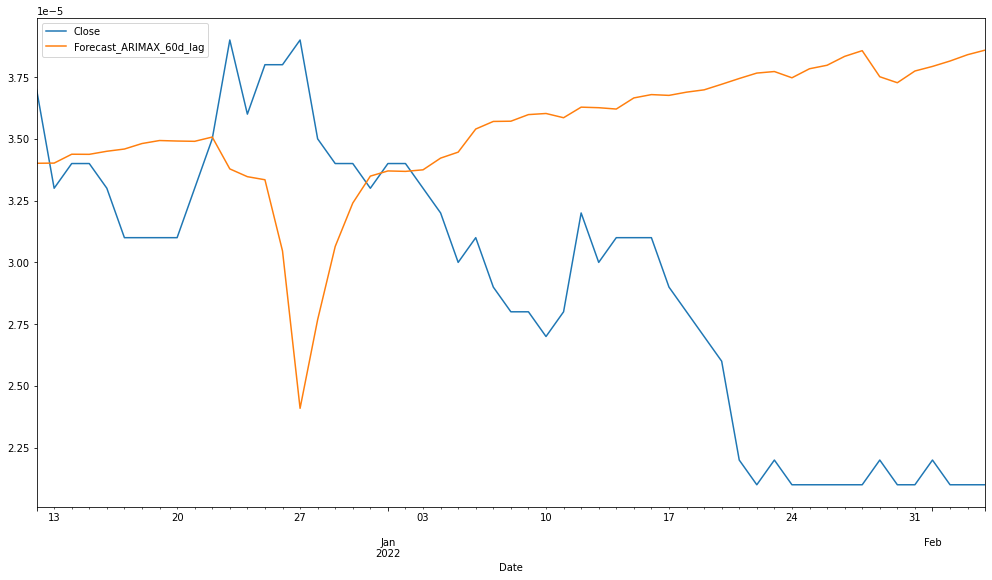

In [8]:
from python_scripts.sarima_helper import train_test_split_continual, predict_with_windows, create_lagged_value_columns

lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']

#Predikcija za skup 90:10
for window in windows:
    df_shiba = pd.read_csv(f'../shiba_{window}d_lag.csv', parse_dates=['Date'], date_parser=dateparse)
    df_shiba.set_index(["Date"], drop=False, inplace=True)
    df_shiba_lag = create_lagged_value_columns(lag_features, [window], df_shiba)
    train, test = train_test_split_continual(df_shiba_lag, 0.1)
    predict_with_windows([window], train, test, lag_features, is_advanced=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2075.222, Time=5.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1818.757, Time=3.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2059.372, Time=3.76 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1917.328, Time=3.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.785, Time=1.29 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2077.095, Time=5.63 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2060.724, Time=4.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2057.868, Time=4.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-2075.518, Time=5.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2074.744, Time=5.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1695.899, Time=1.81 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-2072.395, Time=5.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2079.168, Time=4.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2062.637, Time=4.32 sec
 ARIMA(1,0,1)(0,0,0)[0

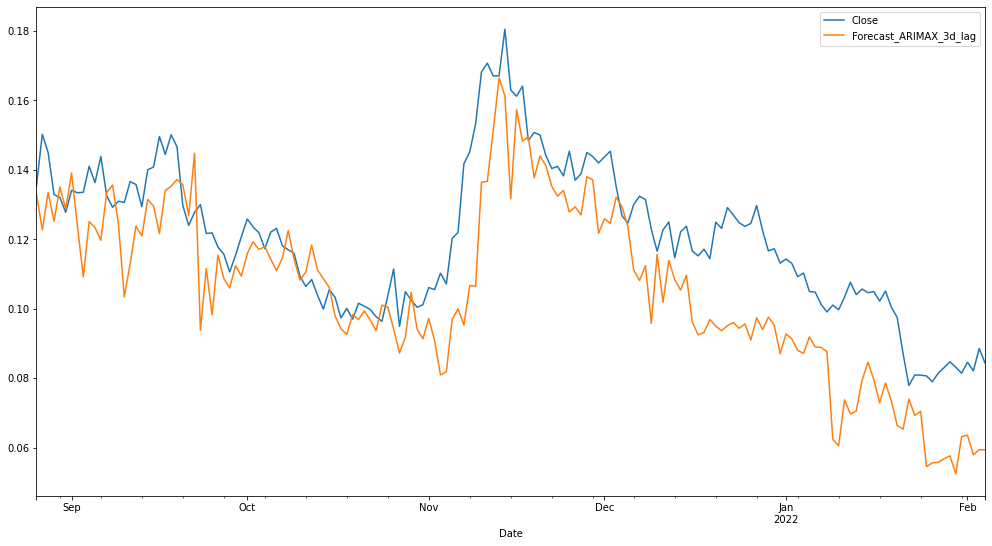

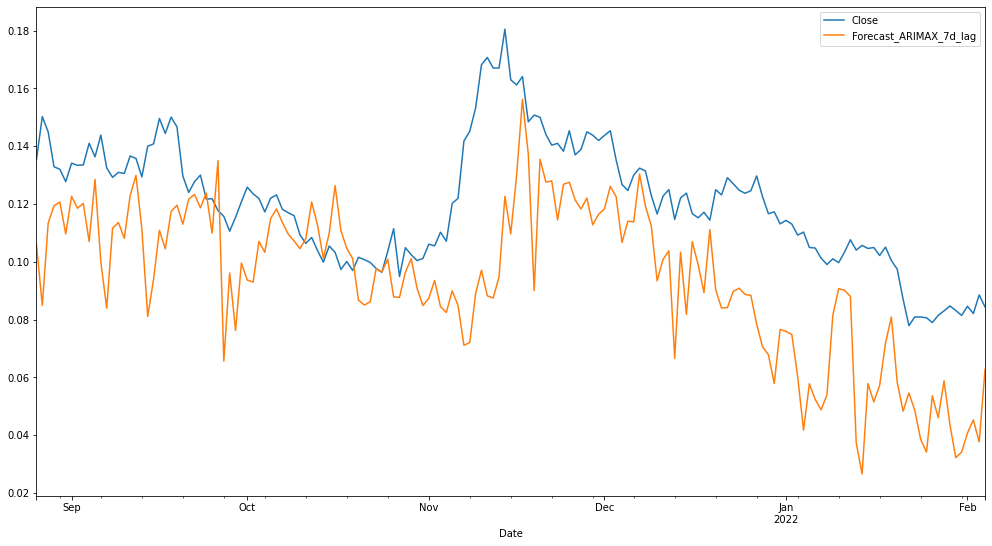

In [9]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']
windows =[3,7]
#Predikcija za skup 70:30
for window in windows:
    df_idena = pd.read_csv(f'../idena_{window}d_lag.csv', parse_dates=['Date'], date_parser=dateparse)
    df_idena.set_index(["Date"], drop=False, inplace=True)
    df_idena_lag = create_lagged_value_columns(lag_features, [window], df_idena)
    train, test = train_test_split_continual(df_idena_lag, 0.3)
    predict_with_windows([window], train, test, lag_features, is_advanced=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-7926.508, Time=9.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7224.590, Time=5.91 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7816.724, Time=6.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7498.923, Time=6.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1472.881, Time=6.95 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7901.131, Time=10.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7003.650, Time=8.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-7911.363, Time=10.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-7934.690, Time=10.97 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-7919.335, Time=9.54 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-7931.366, Time=10.02 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-7996.466, Time=11.78 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-7956.574, Time=12.59 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-7990.636, Time=12.34 sec
 ARIMA(2,0,5)

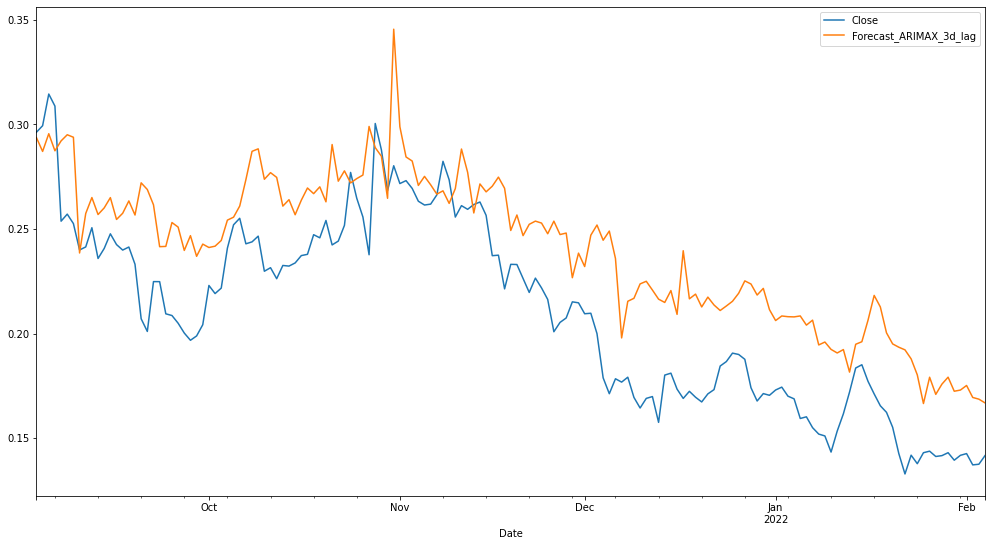

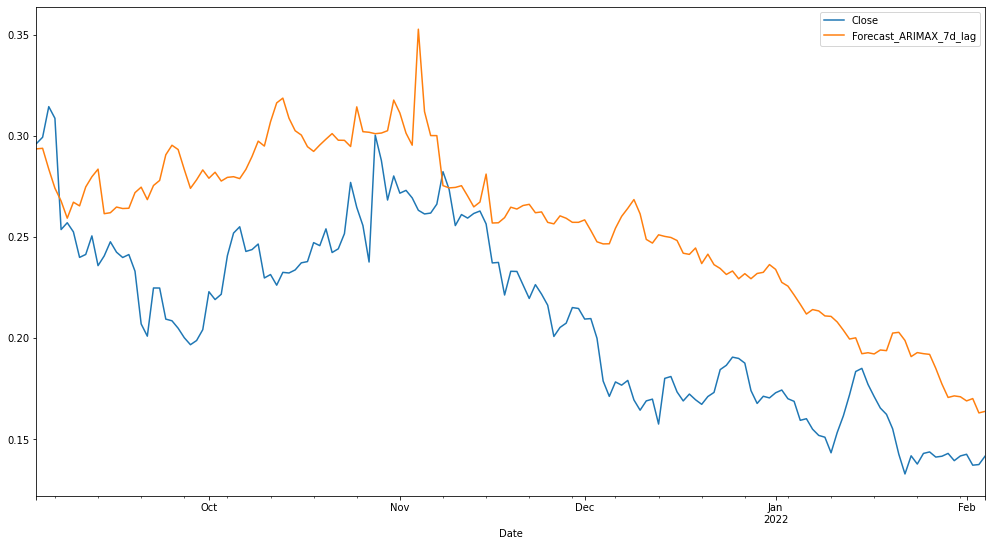

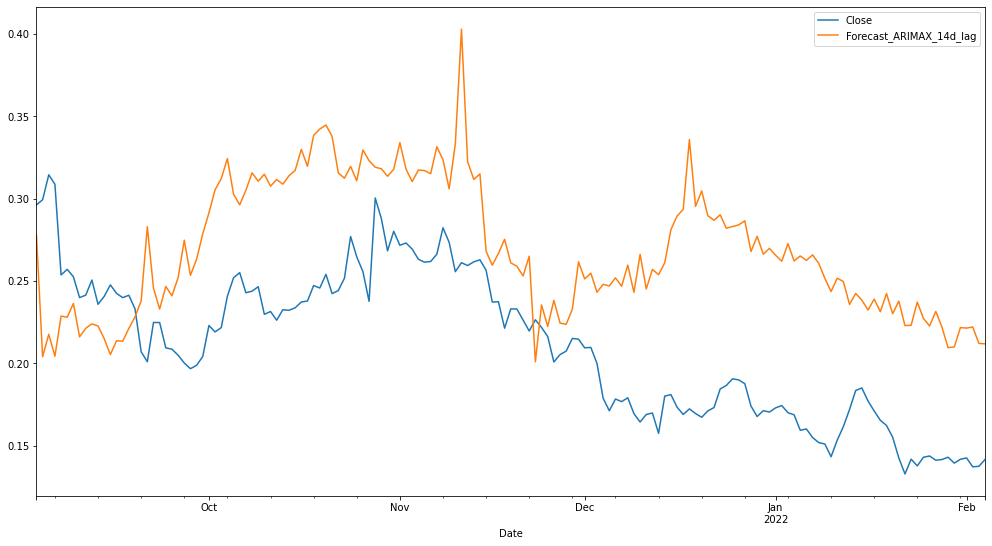

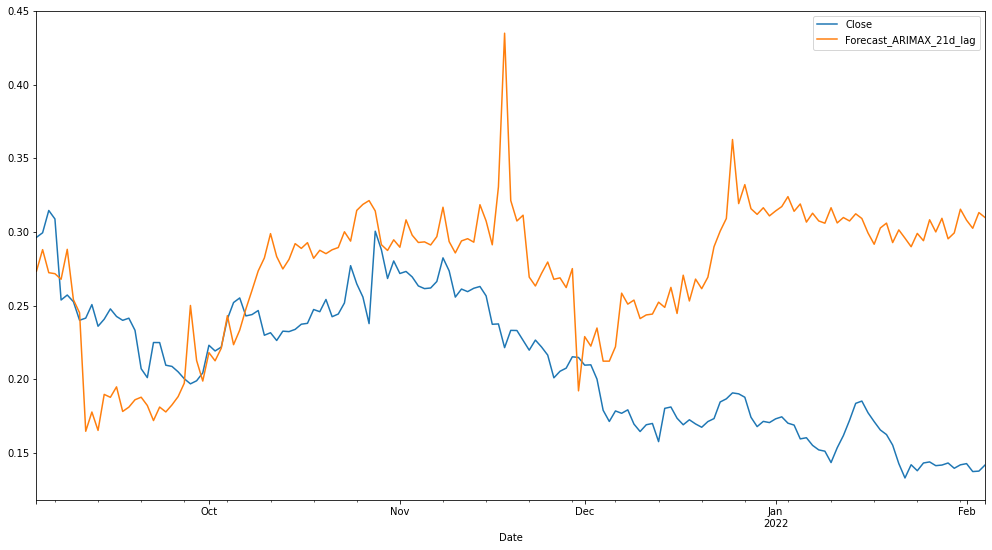

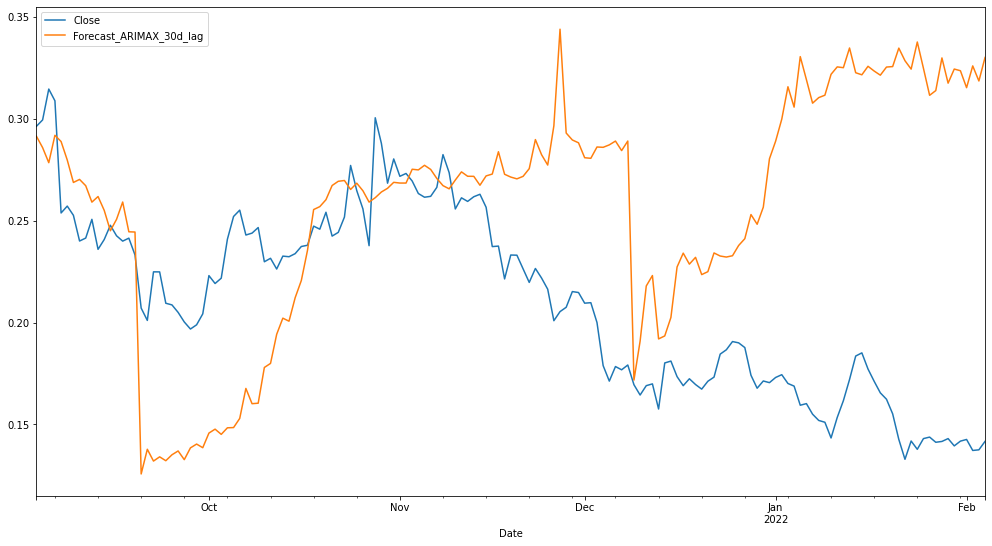

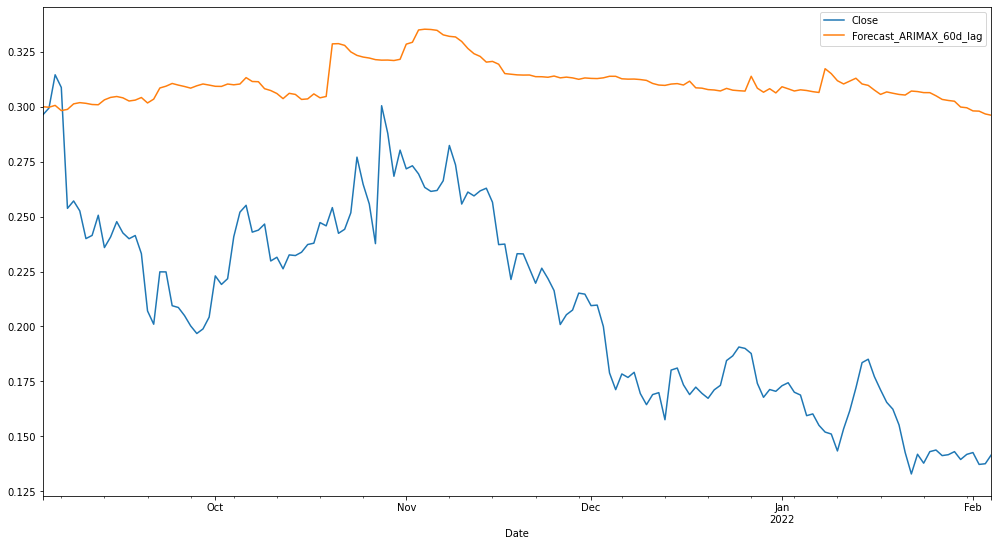

In [10]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]
windows = [3,7,14,21,30,60]
#Predikcija za skup 90:10
for window in windows:
    df_doge = pd.read_csv(f'../doge_{window}d_lag.csv', parse_dates=['Date'], date_parser=dateparse)
    df_doge.set_index(["Date"], drop=False, inplace=True)
    df_doge_lag = create_lagged_value_columns(lag_features, [window], df_doge)
    train, test = train_test_split_continual(df_doge_lag, 0.1)
    predict_with_windows([window], train, test, lag_features, is_advanced=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-10486.801, Time=2.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10473.585, Time=1.62 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10491.894, Time=1.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10487.286, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8576.118, Time=1.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10490.423, Time=1.96 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10490.279, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10488.225, Time=2.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10493.897, Time=1.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-10492.427, Time=1.83 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10492.286, Time=1.85 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10489.289, Time=1.70 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10490.280, Time=1.96 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 24.551 seco

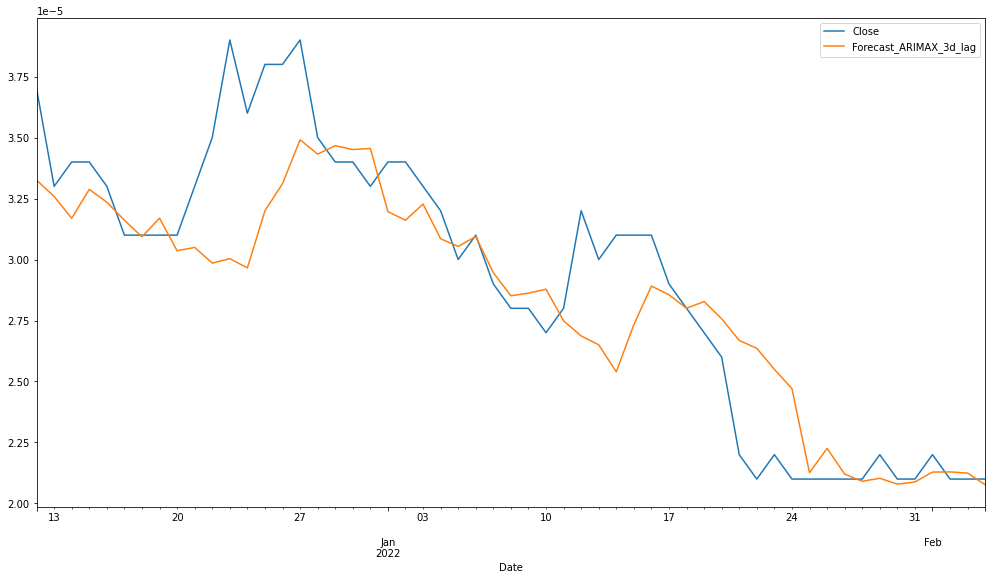

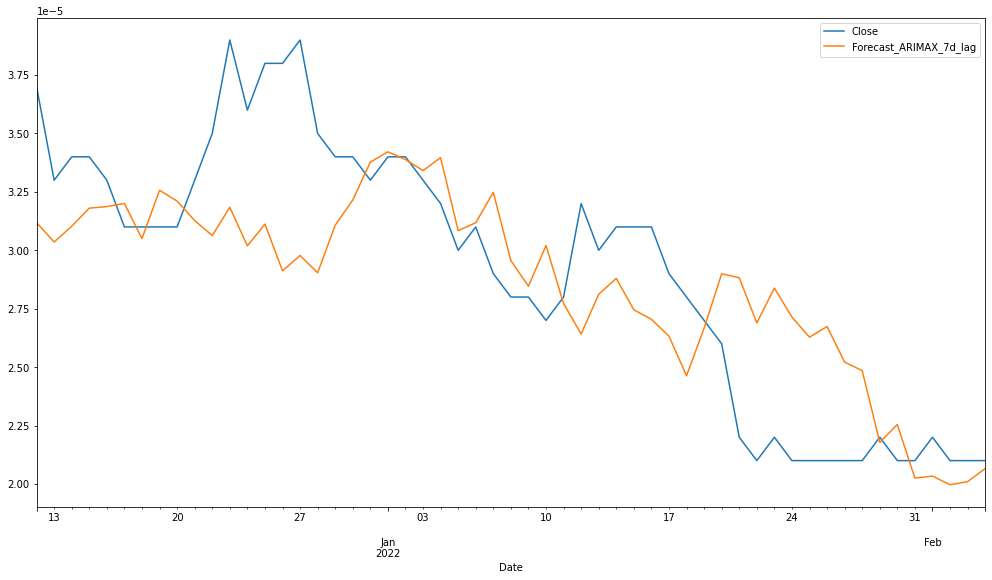

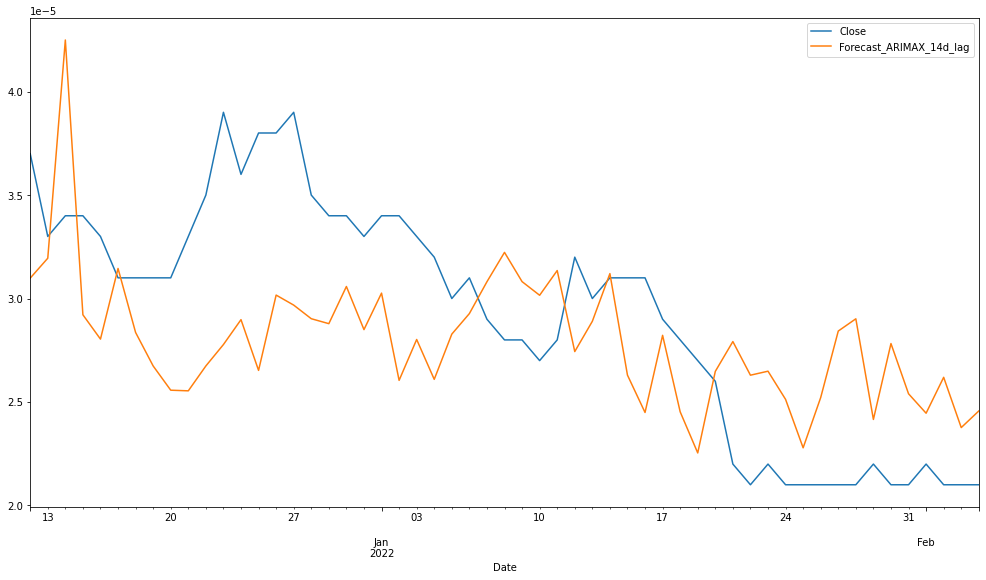

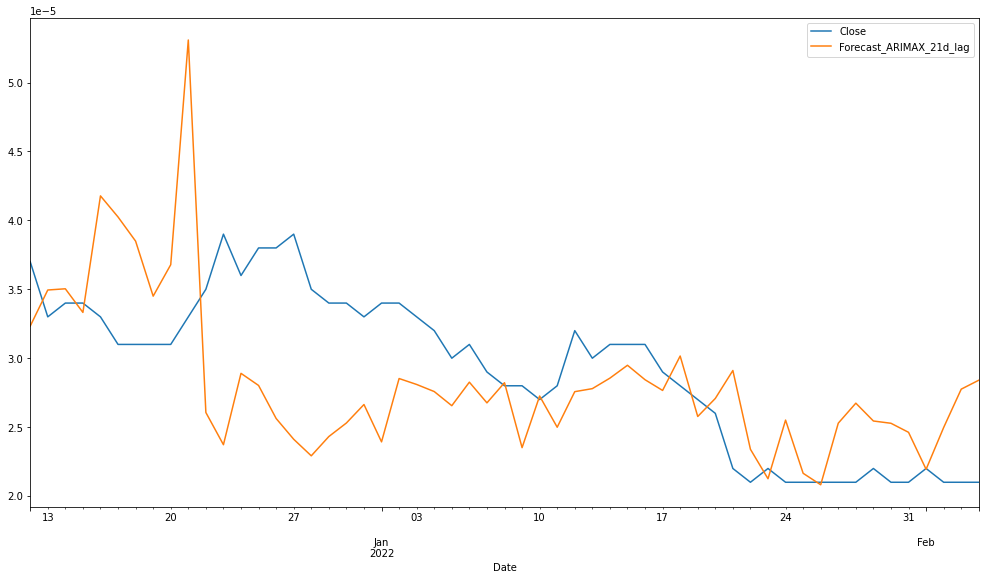

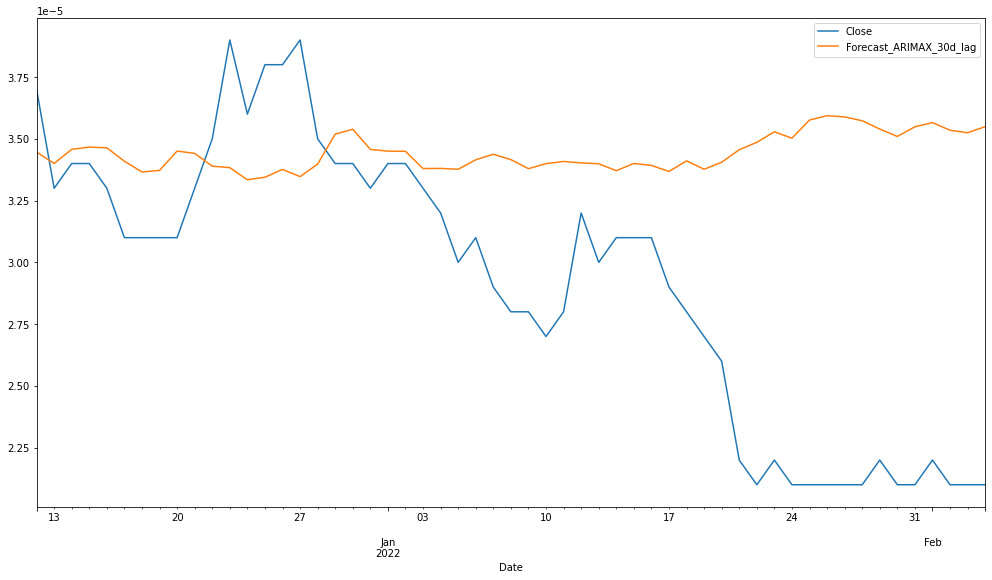

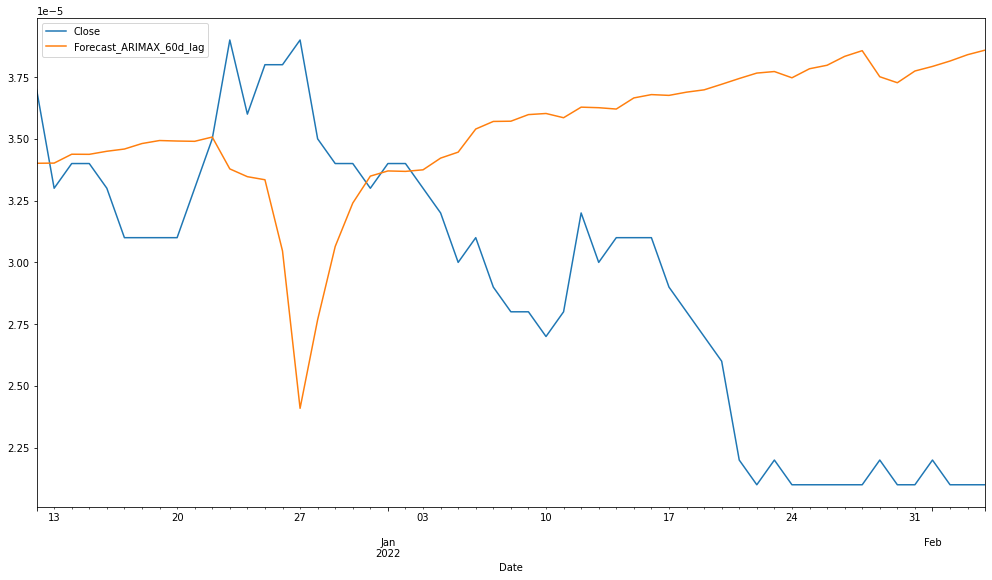

In [11]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']

windows = [3,7,14,21,30,60]
df_shiba = pd.read_csv(f'../shiba_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df_shiba.set_index(["Date"], drop=False, inplace=True)
df_shiba_lag = create_lagged_value_columns(lag_features, windows, df_shiba)
train, test = train_test_split_continual(df_shiba_lag, 0.1)
predict_with_windows(windows, train, test, lag_features, is_advanced=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2075.222, Time=5.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1818.757, Time=3.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2059.372, Time=3.76 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1917.328, Time=3.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.785, Time=1.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2077.095, Time=5.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2060.724, Time=4.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2057.868, Time=4.53 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-2075.518, Time=5.59 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2074.744, Time=5.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1695.899, Time=1.87 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-2072.395, Time=5.84 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2079.168, Time=4.96 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2062.637, Time=4.45 sec
 ARIMA(1,0,1)(0,0,0)[0

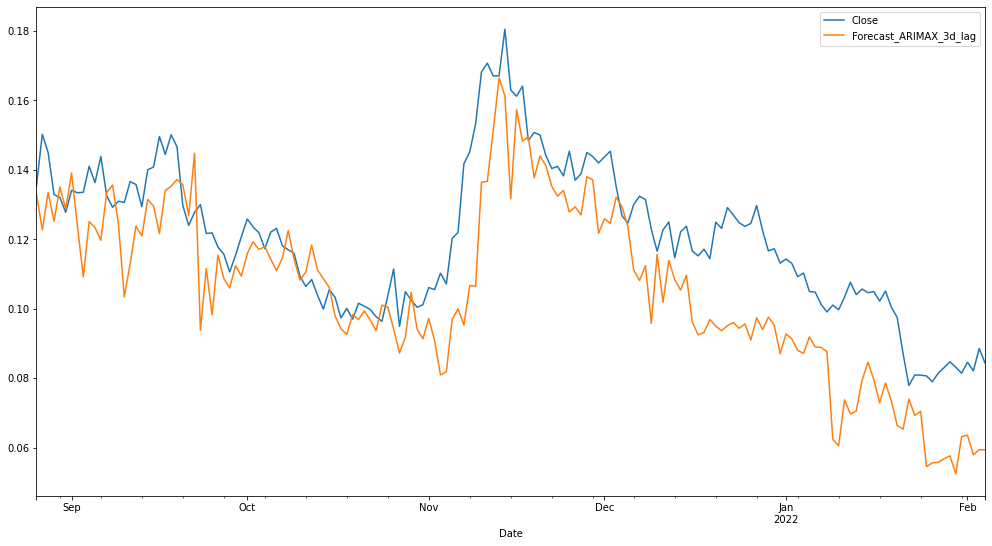

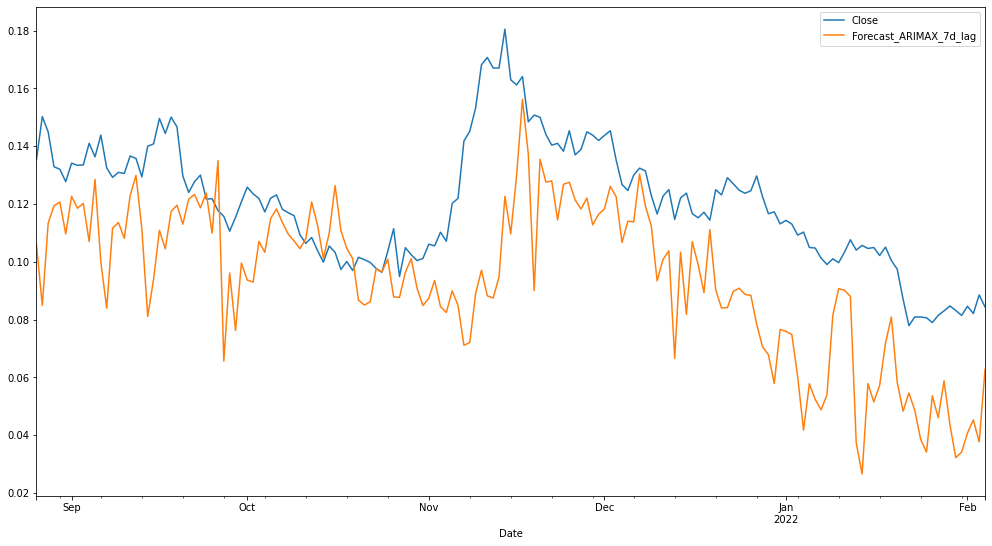

In [12]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']
windows =[3,7]
#Predikcija za skup 70:30
df_idena = pd.read_csv(f'../idena_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df_idena.set_index(["Date"], drop=False, inplace=True)
df_idena_lag = create_lagged_value_columns(lag_features, windows, df_idena)
train, test = train_test_split_continual(df_idena_lag, 0.3)
predict_with_windows(windows, train, test, lag_features, is_advanced=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-7926.508, Time=8.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7224.590, Time=6.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7816.724, Time=6.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7498.923, Time=6.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1472.881, Time=5.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7901.131, Time=9.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7003.650, Time=7.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-7911.363, Time=9.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-7934.690, Time=9.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-7919.335, Time=9.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-7931.366, Time=9.82 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-7996.466, Time=11.07 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-7956.574, Time=10.81 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-7990.636, Time=11.48 sec
 ARIMA(2,0,5)(0,0

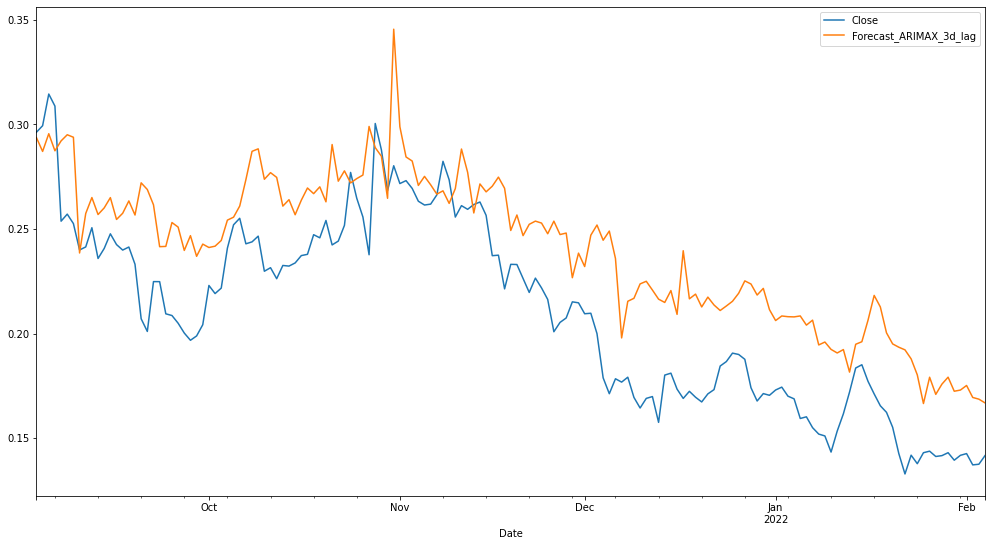

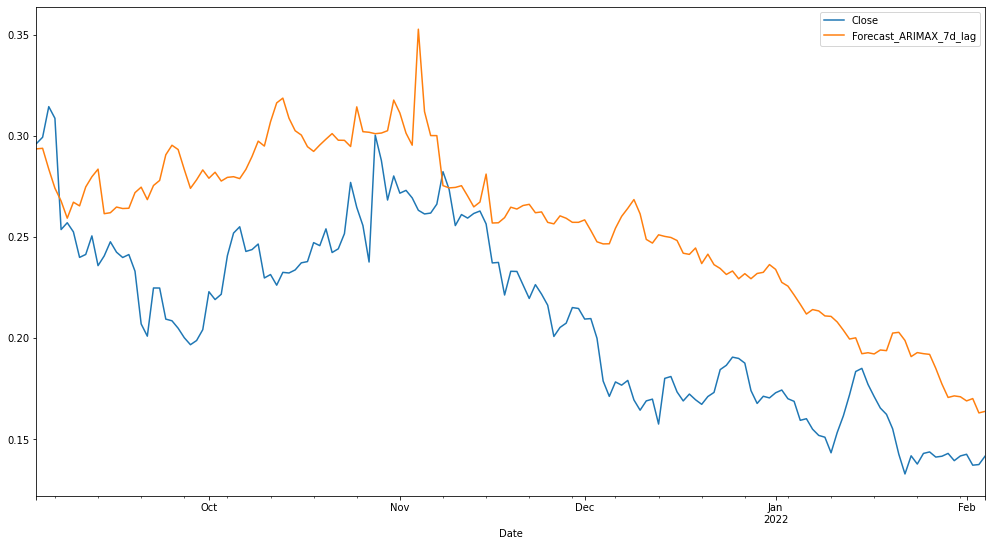

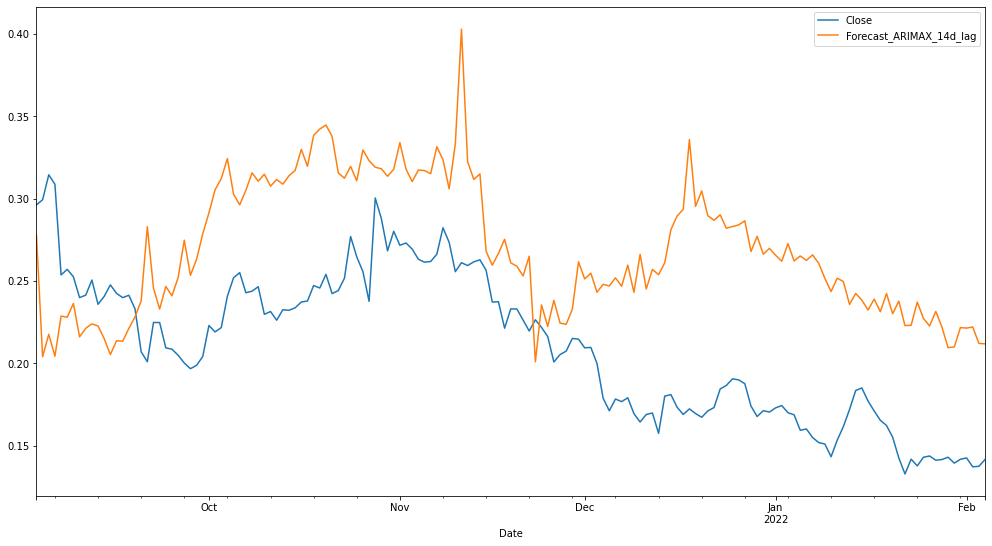

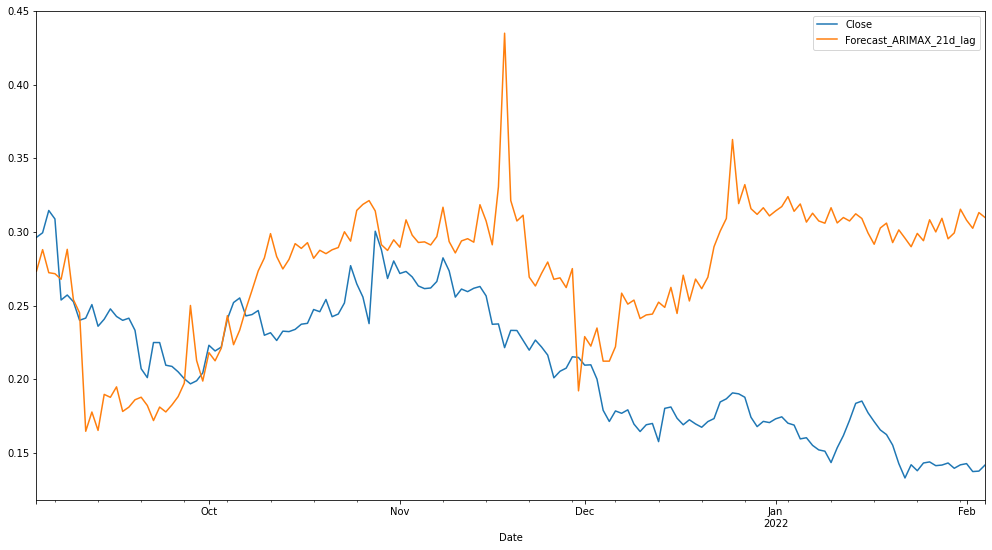

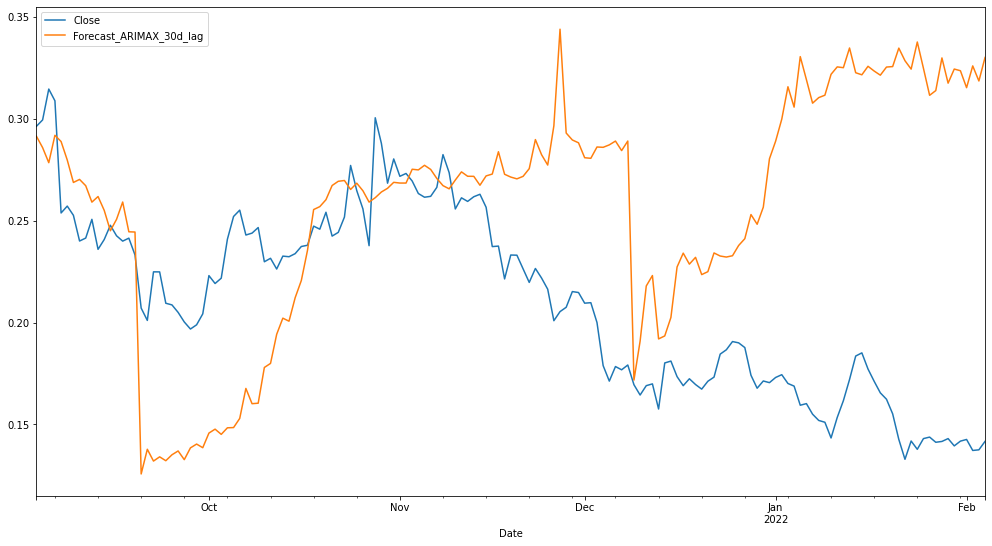

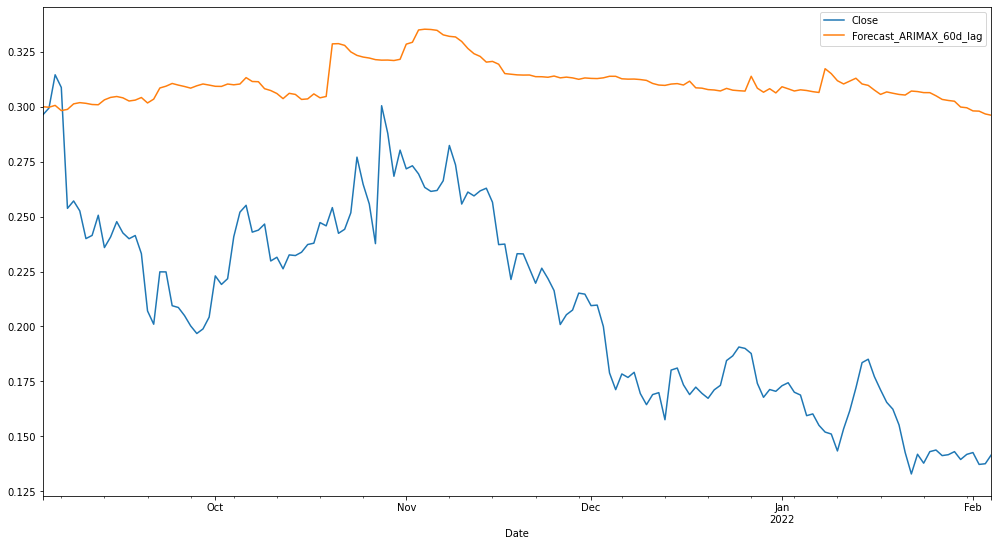

In [13]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]
windows = [3,7,14,21,30,60]
#Predikcija za skup 90:10

df_doge = pd.read_csv(f'../doge_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df_doge.set_index(["Date"], drop=False, inplace=True)
df_doge_lag = create_lagged_value_columns(lag_features, windows, df_doge)
train, test = train_test_split_continual(df_doge_lag, 0.1)
predict_with_windows(windows, train, test, lag_features, is_advanced=True)